In [1]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

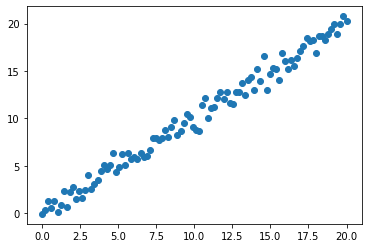

In [14]:
# simulate univariate linear data
x_linear = np.linspace(0, 20, 100)
y_linear = x_linear + np.random.normal(loc=0, scale=.7, size=len(x_linear))

plt.scatter(x_linear, y_linear);

In [19]:
linear_regression_model = sm.GLM(y_linear, x_linear, family=sm.families.Gaussian())
linear_regression_results = linear_regression_model.fit()
linear_regression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                         0.56070
Method:                          IRLS   Log-Likelihood:                -112.46
Date:                Fri, 03 Jul 2020   Deviance:                       55.509
Time:                        14:29:41   Pearson chi2:                     55.5
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0046      0.006    155.314      0.000       0.992       1.017
==============================================================================
"""

In [ ]:
def predict(x, y, results):
    y_hat = results.predict(x)

    mse = np.mean((y - y_hat) ** 2)
    print('Mean Squared Error:', mse)

    plt.scatter(x, y, label='simulated data')
    plt.plot(x, y_hat, label='prediction')
    plt.legend();

Mean Squared Error: 0.5550904053874347


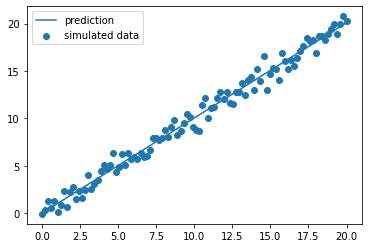

In [20]:
predict(x_linear, y_linear, linear_regression_results)